In this workshop we are goin to work with the dataset of the UPM researchers and their publications. This dataset is composed by two files: a json and a csv. These files are an extended versión of the csv that we used in the web application workshops.

Our goal is obtain as much information as we can from this dataset. We will achieve this in two ways: we will answer questions with numeric values (e.g. what is the average number publications of an UPM reaearcher? or, how many citations have the reseachers, suming all their publications?) or we will generate some charts to present information in a visual way (e.g. how is the relation between the publication year of a paper and its number of citations? or, how is the histogram of the number of publications by researcher?)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
publications = pd.read_json("data/publications.json")
researchers = pd.read_csv("data/researchers.csv")

# Dataset exploration
Any project related with data analysis starts with a study of the data itself: 
* What kind of data do we have?
* How is it organized? How many columns have each dataframe?
* Are there wrong or missing values?
* What does each value of a column means? How many different values are in each column?

With the examples we saw in the previous workshop try to answer that questions.

In [2]:
researchers.name.describe()

count       7170
unique      2828
top       Javier
freq         131
Name: name, dtype: object

# Data cleaning
After a first view of the data and before to start working with it, we must clean it. This proccess is called preprocessing and it is crucial to be able to obtain good results. We will discard invalid data, fill missing values, drop redundant information, etc. We need to create a dataset with the following restrictions.
* All reserachers should have name, last_name and auth_id. All publications should have title, journal and document_id. Drop the rows that do not match this condition (check https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
* There are no duplicated publications (same title) or researchers (same name and lastname). To find duplicates check https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
* All numeric fields must be an integer number bigger or equal to 0. Replace missing values with 0, round decimal values

In [3]:
print("Raw counts\n\tresearchers:{}\n\tpublications:{}".format(len(researchers),len(publications)))
researchers = researchers.dropna(subset=["name","last_name","auth_id"])
publications = publications.dropna(subset=["title","journal","document_id"])
print("Without nulls counts\n\tresearchers:{}\n\tpublications:{}".format(len(researchers),len(publications)))

Raw counts
	researchers:7175
	publications:35964
Without nulls counts
	researchers:7170
	publications:35757


In [4]:
researchers = researchers.drop_duplicates(subset=["name", "last_name"])
publications = publications.drop_duplicates(subset=["title"])
print("Without duplicates counts\n\tresearchers:{}\n\tpublications:{}".format(len(researchers),len(publications)))

Without duplicates counts
	researchers:7057
	publications:35177


In [5]:
print("""
Without values count:
    researchers
        citations: {}
        cited_by: {}
        publications: {}
    publications
        cited_count: {}
""".format( \
           len(researchers[researchers.citations.isna()]), \
           len(researchers[researchers.cited_by.isna()]), \
           len(researchers[researchers.publications.isna()]), \
           len(publications[publications.cited_count.isna()])))

researchers[researchers.citations.isna()].citations = 0
researchers[researchers.cited_by.isna()].cited_by = 0
researchers[researchers.publications.isna()].publications = 0
publications[publications.cited_count.isna()].cited_count = 0


Without values count:
    researchers
        citations: 1
        cited_by: 0
        publications: 2
    publications
        cited_count: 7



C:\Users\jandi\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Finally, to easy some calculations, lets convert the date column of the publications dataset to a datetime type

In [6]:
publications.date = pd.to_datetime(publications.date)

# Data analytics

Once we know about the data we are using and we have cleaned it, we need to ask what kind of useful information we can extract from that data. It is a good idea to make a kind of brainstorming of possible questions, then take the list of resulting questions and sort them by their difficulty, finally begin to answer them starting by the easiest ones.

Yoy may need to use a joined dataset to answer some questions

In [7]:
# This operation creates a dataset combining researchers and publications producing a dataset with one row for each
# combination of researcher-publication in which the researcher is one of the authors of the publication
data = researchers.merge(publications.rename(columns={"authors":"auth_id"}).explode("auth_id"), on="auth_id")

## Basic results

Some of the esaiest question or more basic results we can obtain are the following:
* Numeric results
    * How many researchers are?
    * How many publications are?
    * How many of journals are?
    * How many types of publications are?
    * How many publications of each type are?
    * How many publications have each researcher in average? (Use only researchers dataset)
    * Which is the oldest publication?
    * Which is the publication with most citations?
    * Who is the researcher with more publications? (Use only researchers dataset)
* Graphic results
    * Histogram of the number of publications per researcher
    * Bar chart of the number of publications by type
    * Line chart of the number of publications per year

Som of those questions are just countings, sumations or rankings, but other need data aggregations with ``groupby``.

**Answer each question in a different cell of this notebook (remember that you can insert new cell from the Insert menu).**

In [8]:
res = len(researchers)
print("How many researchers are? {}".format(res))
res = len(publications)
print("How many publications are? {}".format(res))
res = len(publications.journal.unique())
print("How many of journals are? {}".format(res))
res = len(publications.type.unique())
print("How many types of publications are? {}".format(res))
print("How many publications of each type are?")
print(publications.groupby("type")["type"].count())
res = researchers.publications.mean()
print("How many publications have each researcher? {}".format(res))
res = publications.sort_values(by="date").iloc[0]
print("What is the oldest publication?\n{}".format(res))
res = publications.sort_values(by="cited_count", ascending = False).iloc[0]
print("What is the publication with most citations?\n{}".format(res))
res = researchers.sort_values(by="publications", ascending = False).iloc[0]
print("Who is the researcher with more publications?\n{}".format(res))

How many researchers are? 7057
How many publications are? 35177
How many of journals are? 7815
How many types of publications are? 12
How many publications of each type are?
type
Article             21541
Article in Press       84
Book                   45
Chapter               657
Conference Paper    11450
Editorial             277
Erratum               110
Letter                 74
Note                  103
Review                795
Short Survey           32
Name: type, dtype: int64
How many publications have each researcher? 8.913536498936924
What is the oldest publication?
pages                                                    130-145
authors                   [24580537700, 6504371460, 55463179200]
title          Study of the impedance of a platinum electrode...
document_id                                          26744475991
date                                         1959-01-01 00:00:00
journal                                      Electrochimica Acta
openaccess                

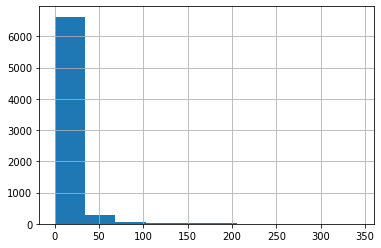

In [9]:
#Histogram of the number of publications of each researcher
researchers.publications.hist()

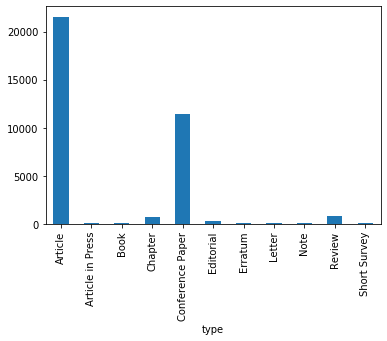

In [10]:
#Bar chart of the number of publications by type
publications.groupby("type").document_id.count().plot.bar()

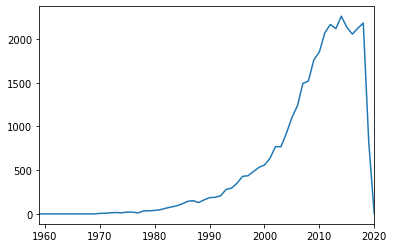

In [11]:
#Line chart of the number of publications per year
def date2year(x):
    return x.year
publications.date.apply(date2year).value_counts().sort_index().plot()

# Intermediate results

* Numeric results
    * How many publications of each researcher are in the data? Is this the same number than the column ``publications``?
    * How many authors have each publication? (show 5)
    * What is the average number of authors in a publication?
    * What is the average number of pages in a publication depending of the publication type?
    * What is the average number of citations in a publication depending of the publication type?
    * How many years each researcher have been active? (difference between the publciationDate of the oldest and newest publications)
* Graphic results
    * Histogram of the number of researchers by the number of active years
    * Histogram of the number of authors in a publication
    * Scatter plot of the publication year vs the number of citations
    * Chart of the average number of citations depending on the publication type
    * Chart of the average number of pages depending on the publication type

**Choose 5 questions from the list and answer each in a different cell.**

In [12]:
# How many publications of each researcher are in the data?
print(data.groupby("auth_id")["auth_id"].count())
# If there is at least one false, then is not the same number
data.groupby("auth_id")["auth_id"].count() == data.groupby("auth_id")["publications"].first()

auth_id
6503848928     2
6503890565     3
6503896634     6
6503903714     1
6503939551     1
              ..
57208623083    1
57208639475    1
57208670663    1
57208685753    1
57208701829    1
Name: auth_id, Length: 5812, dtype: int64


auth_id
6503848928      True
6503890565     False
6503896634      True
6503903714      True
6503939551      True
               ...  
57208623083     True
57208639475     True
57208670663     True
57208685753     True
57208701829     True
Length: 5812, dtype: bool

In [13]:
#How many authors have each publication? (show 5)
def author_len(x):
    try:
        return len(x)
    except:
        return 0
publications["n_authors"] = publications.authors.apply(author_len)
publications.iloc[:5]

,pages,authors,title,document_id,date,journal,openaccess,cited_count,type,n_authors
0,664-678,"[57204955584, 57200520067, 24922369500, 244382...",High-Efficiency High-Bandwidth Four-Quadrant F...,85058136304,2019-06-01,IEEE Journal of Emerging and Selected Topics i...,False,0.0,Article,8
1,6356-6363,"[7005227142, 57200519327, 57200511770, 2443825...",Energy-Buffered Single-Phase Inverter Operatin...,85060314395,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,2.0,Conference Paper,5
2,1293-1300,"[57200511770, 57200519327, 56249124100, 244382...",ZVS transitions in Multi-Mode Single Stage Inv...,85060302761,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,1.0,Conference Paper,5
3,7375-7379,"[57195619519, 57204116610, 24438258500, 700522...",Equivalent Parameters of Round and Litz Wire C...,85060302746,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,0.0,Conference Paper,5
4,4934-4939,"[57200519327, 57200511770, 24438258500, 562491...",Digital Variable Frequency Control of a Single...,85060299891,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,1.0,Conference Paper,5


In [14]:
#What is the average number of authors in a publication?
print("What is the average number of authors in a publication? "+str(publications.n_authors.mean()))

What is the average number of authors in a publication? 5.266480939250078


In [15]:
#What is the average number of pages in a publication depending of the publication type?
import numpy as np
import re
def range2num(x):
    try:
        x = re.sub("[a-zA-Z]+", "", str(x))
        range_values = [n.lstrip('0') for n in x.split("-")]
        return 1+int(max(range_values))-int(min(range_values))
    except:
        return np.nan
publications["n_pages"] = publications.pages.apply(range2num)
publications.dropna(subset=["n_pages"]).groupby("type").n_pages.mean()

type
Article             1041.499368
Article in Press      12.111111
Book                 221.904762
Chapter               17.284404
Conference Paper       8.531924
Editorial              2.615385
Erratum                1.153846
Letter                 2.802817
Note                   4.790698
Review                12.670504
Short Survey           5.137931
Name: n_pages, dtype: float64

In [16]:
#What is the average number of citations in a publication depending of the publication type?
publications.dropna(subset=["cited_count"]).groupby("type").cited_count.mean()

type
Article             17.486441
Article in Press     0.607143
Book                51.866667
Chapter              3.022866
Conference Paper     4.654760
Editorial            2.209386
Erratum              0.736364
Letter               8.864865
Note                 5.145631
Review              36.311083
Short Survey        14.000000
Name: cited_count, dtype: float64

In [17]:
#How many years each researcher have been active? (difference between the publciationDate of the oldest and newest publications)
def date2year(x):
    return x.year
data["year"] = data.date.apply(date2year)
data_grouped = data.groupby("auth_id",as_index=False).agg({"year":["max", "min"]})
data_grouped.columns = ["auth_id","date_max", "date_min"]
data_grouped["active"] = data_grouped.date_max-data_grouped.date_min+1 #Calculate active time
data_grouped

,auth_id,date_max,date_min,active
0,6503848928,2004.0,2000.0,5.0
1,6503890565,2017.0,1987.0,31.0
2,6503896634,1999.0,1987.0,13.0
3,6503903714,1997.0,1997.0,1.0
4,6503939551,2000.0,2000.0,1.0
...,...,...,...,...
5807,57208623083,2018.0,2018.0,1.0
5808,57208639475,2003.0,2003.0,1.0
5809,57208670663,2019.0,2019.0,1.0
5810,57208685753,2019.0,2019.0,1.0


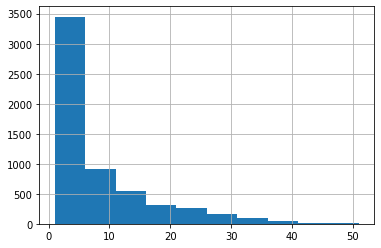

In [18]:
#Histogram of the number of researchers by the number of active years
data_grouped.active.hist()

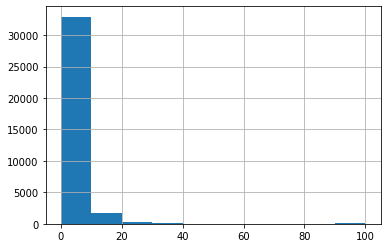

In [19]:
#Histogram of the number of authors in a publication
publications.n_authors.hist()

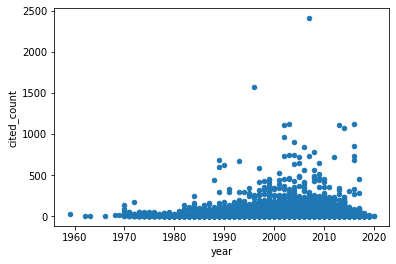

In [20]:
#Scatter plot of the publication year vs the number of citations
publications["year"]=publications.date.apply(date2year)
publications[["year","cited_count"]].plot.scatter(x="year", y="cited_count")

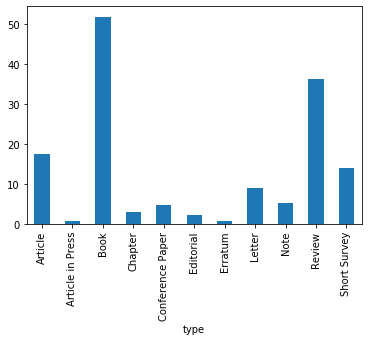

In [21]:
#Chart of the average number of citations depending on the publication type
publications.dropna(subset=["cited_count"]).groupby("type").cited_count.mean().plot.bar()

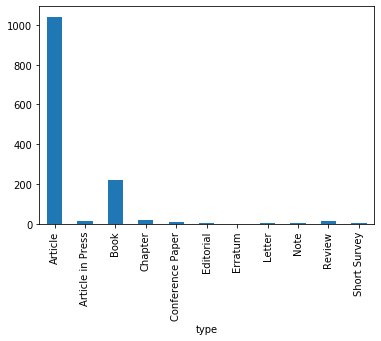

In [22]:
#Chart of the average number of pages depending on the publication type
publications.dropna(subset=["n_pages"]).groupby("type").n_pages.mean().plot.bar()

## Advanced results

The most difficult questions to answer usually are a small set which needs more explanation than a single line.

* Coauthor: 
    One researcher is coatuhor with other if both appears as author in at least one publication. 
    * What is the average number of different coauthors of each researcher?
    * What is the most frequent coauthor (their id) of each researcher?


* H-index: 
    The h-index (https://en.wikipedia.org/wiki/H-index) is a metric that tries to describe the impact of a researcher based on the number of citations received in each publication. A researcher has a h-index of `n` if she has at least `n` publications with `n` or more citations.

    * What is the h-index of each researcher?
    * Chart of the publications and number of citations of a certain researcher, highlinting (in a different color) which publications contributed to the h-index

![alt text](img/h-index.svg "H-Index")

**Choose 1 group and solve it.**

In [23]:
publications["authors2"] = publications.authors
data2 = researchers.merge(publications.rename(columns={"authors2":"auth_id"}).explode("auth_id"), on="auth_id")

In [24]:
# Coauthors
def coauthorCount(x):
    coauths = {}
    for i in x:
        if i in coauths:
            coauths[i] += 1
        else:
            coauths[i] = 0
    return coauths

data2.groupby("auth_id")["authors"].sum().apply(lambda x: len(coauthorCount(x))-1)

auth_id
6503848928     4
6503890565     5
6503896634     8
6503903714     3
6503939551     4
              ..
57208623083    8
57208639475    6
57208670663    4
57208685753    5
57208701829    3
Name: authors, Length: 5812, dtype: int64

In [25]:
# What is the most frequent coauthor (their id) of each researcher?
def getMax(x):
    key = ""
    value = -1
    for i in x:
        if x[i] > value:
            value = x[i]
            key = i
    return i
data2.groupby("auth_id")["authors"].sum().apply(lambda x: getMax(coauthorCount(x)))

auth_id
6503848928      6507041750
6503890565      8669447500
6503896634     24370009100
6503903714      6602840811
6503939551      7202945116
                  ...     
57208623083     6602910559
57208639475    23107265900
57208670663    55994487100
57208685753    22939175500
57208701829    57195692330
Name: authors, Length: 5812, dtype: int64

In [26]:
# H-index
def hindex(x):
    x.sort()
    for i in range(len(x),0,-1):
        if x[len(x)-i] >= i:
            return i
    return 0        
data.groupby("auth_id")["cited_count"].apply(lambda x: hindex(list(x)))

auth_id
6503848928     0
6503890565     1
6503896634     5
6503903714     1
6503939551     1
              ..
57208623083    0
57208639475    0
57208670663    0
57208685753    0
57208701829    0
Name: cited_count, Length: 5812, dtype: int64

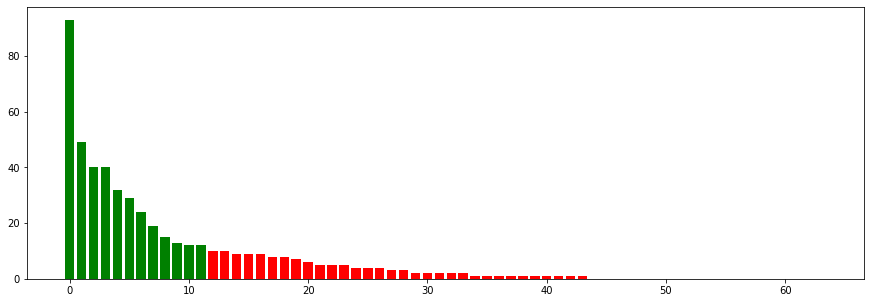

In [27]:
# Chart of the publications and number of citations of a certain researcher
researcher_id = 7003501614
citations = data[data["auth_id"]==researcher_id]["cited_count"].sort_values(ascending=False).values
h = hindex(list(citations))
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(range(h),citations[citations>=h],color="green")
ax.bar(range(h, len(citations)),citations[citations<h],color="red")
plt.show(fig)